In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from autoemulate.compare import AutoEmulate
from sklearn.metrics import r2_score

from autoemulate.experimental_design import LatinHypercube
from autoemulate.simulations.flow_functions import FlowProblem

show_progress = False if os.getenv("JUPYTER_BOOK_BUILD", "false").lower() == "true" else True

In [2]:
fp = FlowProblem(ncycles=10, ncomp=10, amp=900.)
fp.generate_pulse_function()

fp.solve()

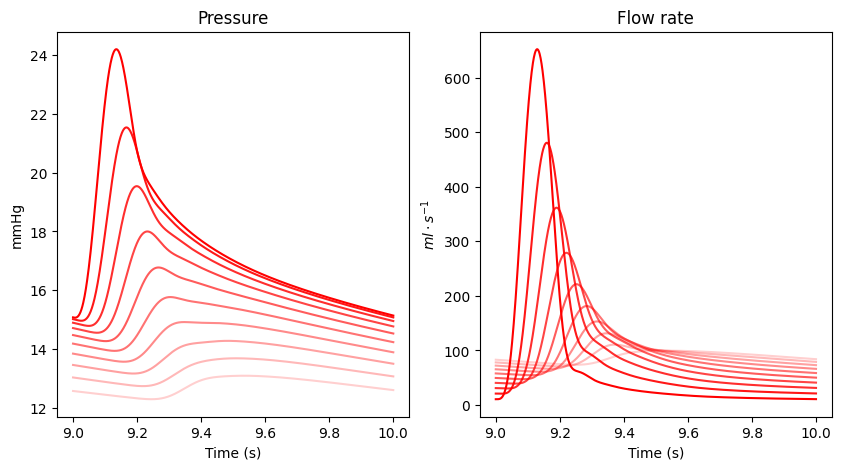

In [3]:
fig, ax = fp.plot_res()
plt.show()

In [4]:
## specify valid parameter ranges
# Dictionary with parameters and their scaled ranges for the blood flow model
parameters_range = {
    'T': tuple(np.array([0.5, 1.5]) * 1.0),  # Cardiac cycle period (s)
    'td': tuple(np.array([0.8, 1.2]) * 0.2),  # Pulse duration (s)
    'amp': tuple(np.array([0.8, 1.2]) * 900.0),  # Amplitude (e.g., pressure or flow rate)
    'dt': tuple(np.array([0.5, 1.5]) * 0.001),  # Time step (s)
    'C': tuple(np.array([0.8, 1.2]) * 38.0),  # Compliance (unit varies based on context)
    'R': tuple(np.array([0.8, 1.2]) * 0.06),  # Resistance (unit varies based on context)
    'L': tuple(np.array([0.8, 1.2]) * 0.0017),  # Inductance (unit varies based on context)
    'R_o': tuple(np.array([0.8, 1.2]) * 0.025),  # Outflow resistance (unit varies based on context)
    'p_o': tuple(np.array([0.9, 1.1]) * 10.0)  # Initial pressure (unit varies based on context)
}

# Output the dictionary for verification

parameters_range

{'T': (0.5, 1.5),
 'td': (0.16000000000000003, 0.24),
 'amp': (720.0, 1080.0),
 'dt': (0.0005, 0.0015),
 'C': (30.400000000000002, 45.6),
 'R': (0.048, 0.072),
 'L': (0.00136, 0.0020399999999999997),
 'R_o': (0.020000000000000004, 0.03),
 'p_o': (9.0, 11.0)}

In [5]:
## sample from parameter range

N_samples = 60
lhd = LatinHypercube(parameters_range.values())
sample_array = lhd.sample(N_samples)
sample_df    = pd.DataFrame(sample_array, columns=parameters_range.keys())  
print("Number of parameters", sample_df.shape[1], "Number of samples from each parameter", sample_df.shape[0])
sample_df.head()

Number of parameters 9 Number of samples from each parameter 60


,T,td,amp,dt,C,R,L,R_o,p_o
0,0.684038,0.190767,849.332062,0.001015,33.343850,0.056689,0.001456,0.020032,9.474836
1,1.289958,0.219502,987.368926,0.001478,39.672770,0.069313,0.001629,0.024980,10.767059
2,0.667158,0.210151,1012.098263,0.000708,40.138070,0.069787,0.001844,0.026479,9.380490
3,0.911555,0.205005,810.172461,0.000849,38.029892,0.051477,0.001679,0.020242,9.696582
4,0.628974,0.178324,978.375940,0.001249,35.113034,0.055173,0.001647,0.027704,10.359299


In [6]:
# enforce parameter relations (eg td <= T)
sample_df['td'] = sample_df.apply(lambda row: row['td']* row['T'], axis=1)

In [7]:
sample_df

,T,td,amp,dt,C,R,L,R_o,p_o
0,0.684038,0.130492,849.332062,0.001015,33.343850,0.056689,0.001456,0.020032,9.474836
1,1.289958,0.283149,987.368926,0.001478,39.672770,0.069313,0.001629,0.024980,10.767059
2,0.667158,0.140204,1012.098263,0.000708,40.138070,0.069787,0.001844,0.026479,9.380490
3,0.911555,0.186873,810.172461,0.000849,38.029892,0.051477,0.001679,0.020242,9.696582
4,0.628974,0.112161,978.375940,0.001249,35.113034,0.055173,0.001647,0.027704,10.359299
5,1.058188,0.175585,780.499494,0.001090,33.139404,0.053060,0.001600,0.021030,10.037413
6,1.391867,0.228690,873.329578,0.001214,40.292215,0.050518,0.001689,0.028870,9.035917
7,1.316122,0.311517,766.639782,0.001081,36.233463,0.064410,0.001476,0.029039,10.738364
8,1.188633,0.253218,745.603813,0.001123,33.463998,0.056055,0.001900,0.021352,9.948698
9,0.536025,0.094130,1003.533738,0.001283,38.951695,0.058649,0.001381,0.021906,10.592086


In [8]:
# Fixed parameters: Number of compartments and cycles
ncomp = 10
ncycles = 10

# Function to run a simulation for a given set of parameters
def simulate(param_dict):
    fp = FlowProblem(ncycles=ncycles, ncomp=ncomp, **param_dict)
    fp.generate_pulse_function()
    fp.solve()
    return fp, fp.res.t, fp.res.y

Y = []
# Iterate over each sample of parameters
for index, row in tqdm(sample_df.iterrows(), total=len(sample_df), disable=show_progress):
    param_dict = row.to_dict() 
    fp, t, y = simulate(param_dict) 
    # extract peak pressure
    peak_pressure = y[:ncomp, :].max()
    Y.append(peak_pressure)

In [9]:
em = AutoEmulate()
parameter_names = list(parameters_range.keys())
em.setup(sample_df[parameter_names], Y, models = ['gp', 'svm','lgbm'])

,Values
Simulation input shape (X),"(60, 9)"
Simulation output shape (y),"(60,)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Scale output data (scale_output),True
Scaler output (scaler_output),StandardScaler
Do hyperparameter search (param_search),False
Reduce input dimensionality (reduce_dim),False
Reduce output dimensionality (reduce_dim_output),False


In [10]:
best_model = em.compare()

Cross-validating:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
em.summarise_cv()

,preprocessing,model,short,fold,rmse,r2
0,None,GaussianProcess,gp,2,7.001825,0.990618
1,None,GaussianProcess,gp,4,10.503737,0.988583
2,None,GaussianProcess,gp,1,10.501560,0.981882
3,None,GaussianProcess,gp,0,11.775114,0.979829
4,None,GaussianProcess,gp,3,17.298414,0.918719
5,None,SupportVectorMachines,svm,0,28.728092,0.879938
6,None,SupportVectorMachines,svm,2,31.600210,0.808905
7,None,SupportVectorMachines,svm,1,47.011495,0.636903
8,None,SupportVectorMachines,svm,4,62.904342,0.590541
9,None,SupportVectorMachines,svm,3,41.661484,0.528538


In [12]:
gp = em.get_model("GaussianProcess")
em.evaluate(gp)

,model,short,preprocessing,rmse,r2
0,GaussianProcess,gp,None,3.9484,0.9977


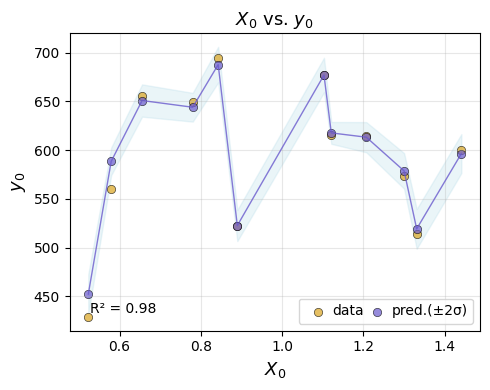

In [11]:
em.plot_eval(gp)

In [12]:
best_emulator = em.refit(gp)

In [13]:
# Extract parameter names and bounds from the dictionary
parameter_names = list(parameters_range.keys())
parameter_bounds = list(parameters_range.values())

# Define the problem dictionary for Sobol sensitivity analysis
problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds
}

In [14]:
em.sensitivity_analysis(problem=problem)

,output,parameter,index,value,confidence
0,y1,T,S1,0.007572,0.000699
1,y1,td,S1,0.019334,0.001928
2,y1,amp,S1,0.877179,0.062439
3,y1,dt,S1,0.000159,0.000021
4,y1,C,S1,0.037066,0.003476
5,y1,R,S1,0.056968,0.005715
6,y1,L,S1,0.004443,0.000376
7,y1,R_o,S1,0.000230,0.000027
8,y1,p_o,S1,0.000502,0.000068
0,y1,T,ST,0.007468,0.008271
